# Lecture 20: practicing with transformations

This practice notebook will guide you in making semi-log and log-log transformations of data to determine the values of model parameters. Data files are provided and I have written a function that will let you perform linear visual fitting.

## Import packages, define functions, and load the data files

The statements below only need to be done once at the beginning

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The below function lets you plot a set of data and experiment with slopes and intercepts to find the best-fitting line

In [49]:
def visual_fit_linear(x_in, data_in, m_in, b_in, xpred_in):
    # get some information from stuff passed in
    nd = len(x_in) # get number of data points
    npred = len(xpred_in) # get length of array to use for x predictions
    ypred = np.empty(npred)
    
    # make predictions at the values in xpred_in
    for i in range(0, npred):
        ypred[i] = m_in * xpred_in[i] + b_in
        
    # create a label for the slope and intercept
    # uses string formatting for the numbers
    # the :.2f means floating point number, round to 2 decimal places
    ypred_label = '$m = ' + '{:.2f}'.format(m_in) \
                + '$, $ b = ' +  '{:.2f}'.format(b_in) + '$'
    
    # make plot of predictions with data
    plt.plot(x_in, data_in,'o');
    plt.plot(xpred_in, ypred, '+', color='orange', label=ypred_label)
    plt.xlabel(r'$x$ variable', fontsize=14);
    plt.ylabel(r'$y$ variable', fontsize=14);
    # plot x and y axes to see more easily
    plt.axhline(0,linestyle='--',color='grey');
    plt.axvline(0,linestyle='--',color='grey');
    plt.legend(fontsize=12)

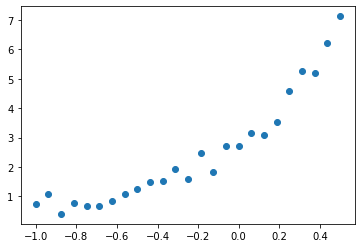

In [77]:
np.random.seed(1)
# generate some random exponential data
npts_exp = 25
x_exp = np.linspace(-1,0.5,num=npts_exp)
exp_k_val = 2
exp_C_val = 2.3
exp_data = np.empty(npts_exp)
for i in range(0,npts_exp):
    exp_data[i] = exp_C_val * np.exp(exp_k_val * x_exp[i]) + 1 * np.random.random()
plt.plot(x_exp, exp_data, 'o');
np.savez('lecture20_file1.npz', xvals=x_exp, data=exp_data)

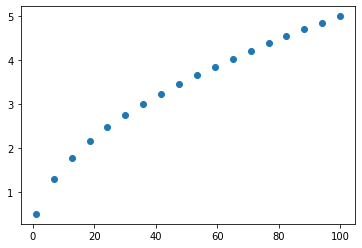

In [78]:
# generate some random power-law data
npts_pow = 18
x_pow = np.linspace(1,100,num=npts_pow)
pow_a_val = 0.5
pow_C_val = 0.5
pow_data = np.empty(npts_pow)
for i in range(0,npts_pow):
    pow_data[i] = pow_C_val *  x_pow[i]**pow_a_val\
                + 0.002 * np.random.normal()
plt.plot(x_pow, pow_data, 'o');
np.savez('lecture20_file2.npz', xvals=x_pow, data=pow_data)

### Load the data files and extract their contents

Load the first data file into `file_contents_1`, the second into `file_contents_2` using the `np.load` function

In [79]:
file_contents_1 = np.load('lecture20_file1.npz')
file_contents_2 = np.load('lecture20_file2.npz')

Use the `files` properties of the variables `file_contents_1` and 2 to see what is contained in the files.

These statements can be removed in labs when you are turning something in. They are just so you can see what's in the file.

In [80]:
file_contents_1.files

['xvals', 'data']

In [81]:
file_contents_2.files

['xvals', 'data']

Extract and store the data in appropriate arrays

In [82]:
xvals_1 = file_contents_1['xvals']
xvals_2 = file_contents_2['xvals']
data_1 = file_contents_1['data']
data_2 = file_contents_2['data']

Make a simple plot of each data set and observe the features of each one

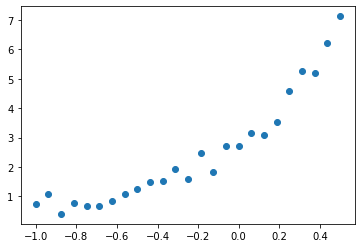

In [83]:
plt.plot(xvals_1, data_1, 'o');

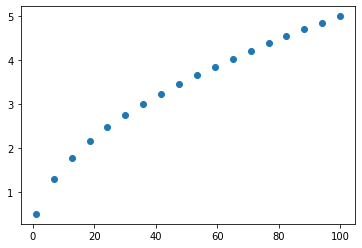

In [84]:
plt.plot(xvals_2, data_2, 'o');

## Work with linearizing transformations for each data set

### Dataset 1: proposed exponential model

Perform a linearizing transformation (pen-and-paper first) for the exponential model $y = C e^{kx}$.

This is the proposed model for data set 1. You will need to figure out what is the value of $C$ and $k$ from the data.

Now define a new array, `ystarvals_1` using `np.empty` to hold the transformed $y$ values. Extract the length of dataset 1 and put it into `n1`. Use a `for` loop and the `np.log` function (this takes the natural log) to store the transformed $y$ values.

In [85]:
n1 = len(xvals_1)
ystarvals_1 = np.empty(n1)

for i in range(0,n1):
    ystarvals_1[i] = np.log(data_1[i])

Plot the data in the new, linearized, form. You can label something as $y^*$ or $x^*$ with the string `r'$y^*$'` or `r'$x^*$'` in the `plt.ylabel` and `plt.xlabel` functions. Does it look linear now?

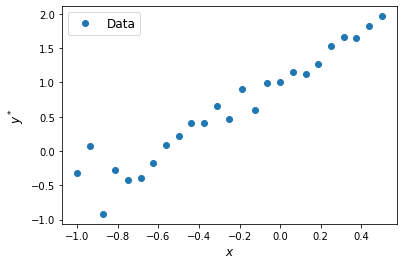

In [86]:
plt.plot(xvals_1, ystarvals_1, 'o', label='Data');
plt.xlabel('$x$', fontsize=12);
plt.ylabel('$y^*$', fontsize=12);
plt.legend(fontsize=12);

Use the `visual_fit_linear` function defined above to determine the values of coefficients from the linearized transformation.

Hint: you need to pass an extra array of x values into the function in order to make the predictions from the linear model. Use the `np.linspace` function to do this. For example

`xpred_lin_1 = np.linspace(0,1,num=100)` makes an array of 100 equally spaced values between 0 and 1.

In [87]:
npred1 = 50
xpred_lin_1 = np.linspace(-1.5,0.5,num=npred1)

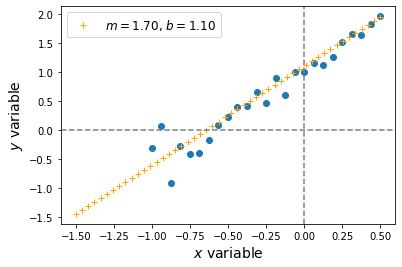

In [88]:
visual_fit_linear(xvals_1, ystarvals_1, 1.7, 1.1, xpred_lin_1)

What values of $C$ and $k$ did you determine from this analysis? Define two variables `k1` and `C1` to hold these values. You may find the function `np.exp` helpful for this. Print the values so you can see what they are before moving on.

In [89]:
k1 = 1.7
C1 = np.exp(1.1)
print('k = ', k1, 'C =', C1)

k =  1.7 C = 3.0041660239464334


Use those values to make predictions **in the original, non-linearized variables**. Create two new arrays, one of x values called `xpred_1` using `np.linspace` and the other called `ypred_1` using `np.empty` to hold the predictions. Use a `for` loop to make the predictions. You may find the `np.exp` function useful here again.

In [90]:
xpred_1 = np.linspace(-1.25, 0.5, num=npred1)
ypred_1 = np.empty(npred1)
for i in range(0, npred1):
    ypred_1[i] = C1 * np.exp(k1 * xpred_1[i])

Finally, plot the predictions in **in the original, non-linearized variables**. Does your prediction look like it is a good fit for the data? Do you see the curvature in the new predictions?

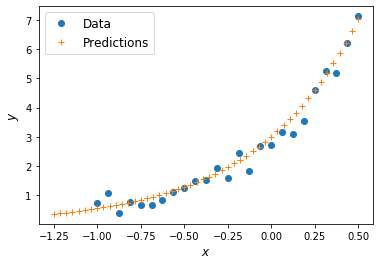

In [91]:
plt.plot(xvals_1, data_1, 'o', label='Data');
plt.plot(xpred_1, ypred_1, '+', label='Predictions')
plt.xlabel('$x$', fontsize=12);
plt.ylabel('$y$', fontsize=12);
plt.legend(fontsize=12);

### Dataset 2: proposed power law model

Repeat the steps used previously for dataset 1 for dataset 2, now for a proposed power-law model $y = C x^a$ . Except now you will need `xstarvals_2` and `ystarvals_2` for the linearized variables. Determine values of $C$ and $a$ using the linearized log-log plot and make final predictions in the original, non-linearized variables.

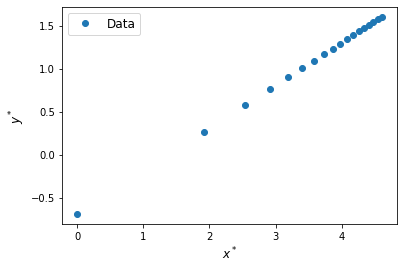

In [93]:
n2 = len(xvals_2)
xstarvals_2 = np.empty(n2)
ystarvals_2 = np.empty(n2)

for i in range(0,n2):
    xstarvals_2[i] = np.log(xvals_2[i])
    ystarvals_2[i] = np.log(data_2[i])  
    
plt.plot(xstarvals_2, ystarvals_2, 'o', label='Data');
plt.xlabel('$x^*$', fontsize=12);
plt.ylabel('$y^*$', fontsize=12);
plt.legend(fontsize=12);

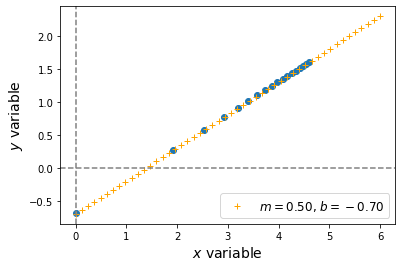

In [98]:
npred2 = 50
xpred_lin_2 = np.linspace(0,6,num=npred2)
visual_fit_linear(xstarvals_2, ystarvals_2, 0.5, -0.7, xpred_lin_2)

a =  0.5 C = 0.4965853037914095


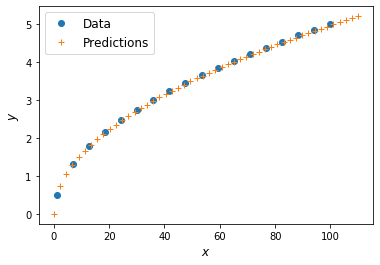

In [101]:
a2 = 0.5
C2 = np.exp(-0.7)
print('a = ', 0.5, 'C =', C2)

xpred_2 = np.linspace(0, 110, num=npred2)
ypred_2 = np.empty(npred2)
for i in range(0, npred2):
    ypred_2[i] = C2 * np.power(xpred_2[i], a2)
    
plt.plot(xvals_2, data_2, 'o', label='Data');
plt.plot(xpred_2, ypred_2, '+', label='Predictions')
plt.xlabel('$x$', fontsize=12);
plt.ylabel('$y$', fontsize=12);
plt.legend(fontsize=12);